In [1]:
from wilf2018.shadowlearn import shadowed_learn
from wilf2018.shadowlearn.kernel import GaussianKernel
from src.shadow_learn import Wilf2018Adapter
from src.datasets import load_iris
from src.model_selection import grid_search
from src.utils import plot_shadowed_set
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [22]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_colors = ['cornflowerblue', 'mediumseagreen', 'crimson']

contourf_colors = ['white', 'pink', 'palevioletred', 'red']

In [23]:
dataset_loader = lambda: load_iris(d=2, target='Iris-virginica')
estimator = Wilf2018Adapter()

In [24]:
c_virginica = 1
d_virginica = .2
phi_virginica = .6
sigma_virginica = .2
c_range = np.concatenate((np.logspace(-1, 1, 0), [1]))
d_range = np.concatenate((np.logspace(-1, 0, 0), [.2]))
phi_range = np.concatenate((np.logspace(-1, 1, 0), [.6]))
sigma_range = np.concatenate((np.logspace(-1, 1, 0), [.2]))

In [25]:
param_grid = {'c': c_range, 'd': d_range, 
              'phi': phi_range, 'sigma': sigma_range}

In [26]:
# Usare Scaled
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, scaled=True)

***** Split n. 0
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.8s finished


mean_fit_time                                              0.355391
std_fit_time                                             0.00381912
mean_score_time                                           0.0132117
std_score_time                                           0.00068151
param_c                                                           1
param_d                                                         0.2
param_phi                                                       0.6
param_sigma                                                     0.2
params               {'c': 1.0, 'd': 0.2, 'phi': 0.6, 'sigma': 0.2}
split0_test_score                                          0.909091
split1_test_score                                          0.818182
split2_test_score                                          0.909091
split3_test_score                                          0.909091
split4_test_score                                          0.909091
split5_test_score                               

100%|##########| 22500/22500 [00:36<00:00, 617.36it/s]


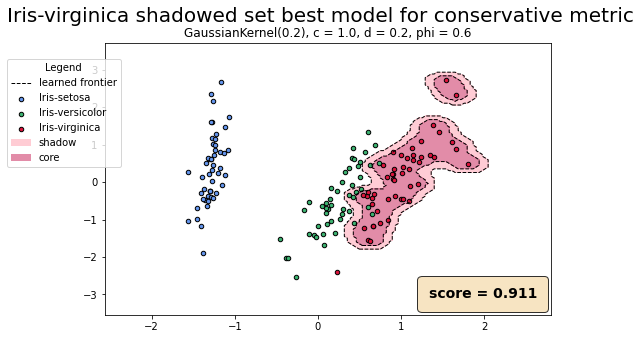

In [27]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

In [12]:
source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(
    filepath_or_buffer=source,
    header=None,
    sep=',')

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # drops the empty line at file-end

iris_df.tail()
iris_values = iris_df.iloc[:,0:4].values
iris_labels = iris_df.iloc[:,4].values
# iris_values_std = StandardScaler().fit_transform(iris_values)
pca_2d = PCA(n_components=2)
# iris_values_2d = pca_2d.fit_transform(iris_values_std)
iris_values_2d = pca_2d.fit_transform(iris_values)

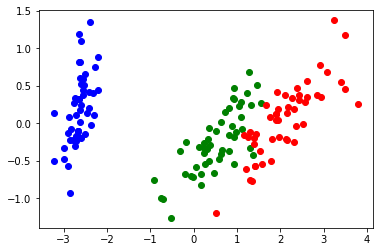

In [13]:
def gr_dataset(): 
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'green', 'red')):
        plt.scatter(iris_values_2d[iris_labels==lab, 0],
                    iris_values_2d[iris_labels==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [14]:
def to_membership_values(labels, target):
    return [1 if l==target else 0 for l in labels]

mu = {}
for target in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    mu[target] = to_membership_values(iris_labels, target)

In [15]:
def gr_shadowed(estimated_shadowed):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_shadowed((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    plt.contourf(X, Y, Z, levels=[-0.5, 0, 0.5, 1, 1.5], colors=['white', 'lightgray', 'darkgray'])

In [16]:
c_virginica = 1
d_virginica = .2
phi_virginica = .6
sigma_virginica = .2

m_virginica, _, s_virginica = shadowed_learn(iris_values_2d,
                                            mu['Iris-virginica'],
                                            c=c_virginica,
                                            d=d_virginica,
                                            phi=phi_virginica,
                                            k=GaussianKernel(sigma_virginica),
                                            adjustment=0)

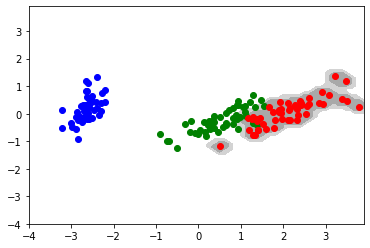

In [17]:
gr_shadowed(s_virginica)
gr_dataset()
plt.show()